<a href="https://colab.research.google.com/github/farhan123806/Statistical-Analysis-of-Healthcare-Data/blob/main/Statistical_Analysis_of_Healthcare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Analysis of Healthcare Data- analysis of ELISA tests and vaccination of Tuberculosis and Influenza.

In [ ]:
import openpyxl
import pandas as pd
from datetime import datetime

In [ ]:
df= pd.read_execl('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1')

In [ ]:
def parse(x):
    y = x.split()
    t = y[1][:8]
    z=y[0] + " " + t
    d = datetime.strptime(z,'%Y-%m-%d %H:%M:%S')
    return d

In [ ]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1',
    na_values="NaN",
    parse_dates=['Date time'],
    index_col=0,
    date_parser=parse)

In [ ]:
df


,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 09:56:35,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.3
2021-03-02 10:10:18,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.4
2021-03-04 11:03:43,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,No,Yes,Maybe (можливо),No,37.7


# Data Preparation

In [ ]:
df = df.dropna(subset=['Gender'])

In [ ]:
d = {'No' : False, 'Yes' : True}
c = 'Do you vaccinated influenza?'
df.loc[:, c] = df[c].map(d)

In [ ]:
df


,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,True,Yes,No,No,38.1
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,False,Yes,No,No,37.0
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,Yes,No,37.8
2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,False,Yes,No,No,NaN
2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,False,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 09:56:35,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,True,Yes,Maybe (можливо),No,37.3
2021-03-02 10:10:18,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,True,Yes,Maybe (можливо),No,37.4
2021-03-04 11:03:43,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,False,Yes,Maybe (можливо),No,37.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3296 non-null   object 
 1   Gender                                 3297 non-null   object 
 2   Region                                 3279 non-null   object 
 3   Do you smoke?                          3267 non-null   object 
 4   Have you had Covid`19 this year?       3296 non-null   object 
 5   IgM level                              3221 non-null   object 
 6   IgG level                              3237 non-null   object 
 7   Blood group                            3243 non-null   float64
 8   Do you vaccinated influenza?           3190 non-null   object 
 9   Do you vaccinated tuberculosis?        3294 non-null   object 
 10  Have you had influenza this year?   

In [ ]:
c = 'Age'
df.loc[:, c] = df[c].astype('category')

In [ ]:
df['Age']

Date time
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    16-22
                       ...  
2021-03-02 09:56:35    40-65
2021-03-02 10:10:18    40-65
2021-03-04 11:03:43    40-65
2021-03-04 11:04:30    40-65
2021-04-05 03:18:16    16-22
Name: Age, Length: 3297, dtype: category
Categories (5, object): ['0-15', '16-22', '23-40', '40-65', '>65']

In [ ]:
for c in df.columns[1:-1]:
    df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else str(x)[:str(x).find('(')] ).astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    3296 non-null   category
 1   Gender                                 3297 non-null   category
 2   Region                                 3297 non-null   category
 3   Do you smoke?                          3297 non-null   category
 4   Have you had Covid`19 this year?       3297 non-null   category
 5   IgM level                              3297 non-null   category
 6   IgG level                              3297 non-null   category
 7   Blood group                            3297 non-null   category
 8   Do you vaccinated influenza?           3297 non-null   category
 9   Do you vaccinated tuberculosis?        3297 non-null   category
 10  Have you had influenza t

In [ ]:
df.describe()

,Maximum body temperature
count,1529.000000
mean,37.710203
std,0.634367
min,36.600000
25%,37.200000
50%,37.700000
75%,38.300000
max,38.800000


In [ ]:
df.describe(include=['category'])

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?
count,3296,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297
unique,5,2,8,3,5,4,5,5,3,5,5,4
top,23-40,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,No,No
freq,1174,1818,3071,2498,1768,2651,2587,1381,2651,2579,2347,3282


# Statistical analysis

In [ ]:
df['Age'].value_counts()

23-40    1174
40-65    1063
16-22     823
>65       193
0-15       43
Name: Age, dtype: int64

In [ ]:
df['Age'].value_counts(normalize=True)

23-40    0.356189
40-65    0.322512
16-22    0.249697
>65      0.058556
0-15     0.013046
Name: Age, dtype: float64

In [ ]:
df.sort_values(by='Age', 
        ascending=True)

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-12-30 02:10:07,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,3.0,False,No,Yes,No,NaN
2020-12-17 19:19:43,0-15,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Maybe,Maybe,No,NaN
2020-12-17 22:59:41,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,Yes,No,NaN
2020-12-17 22:59:41,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,Yes,No,NaN
2020-10-09 19:35:56,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,False,No,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18 01:44:32,>65,Female,"Ukraine, Lviv",Yes,No,<0.9,<0.9,4.0,False,Yes,Yes,No,NaN
2020-12-18 01:44:32,>65,Female,"Ukraine, Lviv",Yes,No,<0.9,<0.9,4.0,False,Yes,Yes,No,NaN
2020-09-22 17:35:09,>65,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,1.0,False,Yes,No,No,NaN


In [ ]:
df.sort_values(by=['Age', 'Gender'], ascending=[True, False]).head()

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:26:09,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,No,No,NaN
2020-09-26 11:19:25,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,False,No,Yes,No,NaN
2020-09-26 11:42:15,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,0.9-1.1,1.0,False,Yes,Maybe,No,38.7
2020-10-09 19:35:56,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,False,No,Yes,No,NaN
2020-11-24 10:55:41,0-15,Male,"Ukraine, Lviv",No,No,<0.9,0.9-1.1,1.0,False,Yes,No,No,NaN


# Data Transformation

In [ ]:
df['Gender'].value_counts()

Female     1818
Male       1479
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts().keys()

CategoricalIndex(['Female ', 'Male '], categories=['Female ', 'Male '], ordered=False, dtype='category')

In [ ]:
df[df['Gender'] == 'Female ']['Maximum body temperature'].mean()

37.70680529300562

In [ ]:
df[(df['Gender'] == 'Male ') & (df['Do you smoke?'] == 'Yes') & (df['Have you had Covid`19 this year?'] == 'Yes')]['Maximum body temperature'].max()

38.8

In [ ]:
df.groupby(['Gender'])['Maximum body temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1058.0,37.706805,0.625076,36.6,37.2,37.7,38.2,38.8
Male,471.0,37.717834,0.655371,36.6,37.1,37.7,38.3,38.8


In [ ]:
pd.crosstab(df['Age'], df['Gender'])

Gender,Female,Male
Age,,
0-15,15,28
16-22,266,557
23-40,645,529
40-65,795,268
>65,96,97


In [ ]:
pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)

Gender,Female,Male,All
Age,,,
0-15,38.500000,37.437500,37.555556
16-22,37.731579,37.790196,37.746305
23-40,37.759053,37.754680,37.757473
40-65,37.679435,37.690780,37.681947
>65,37.502041,37.642647,37.583761
All,37.706528,37.717834,37.710013


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='count'>

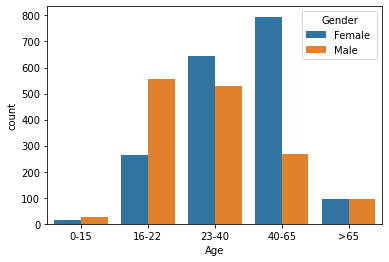

In [ ]:
sns.countplot(x='Age', hue='Gender', data=df)

<AxesSubplot:xlabel='Date time'>

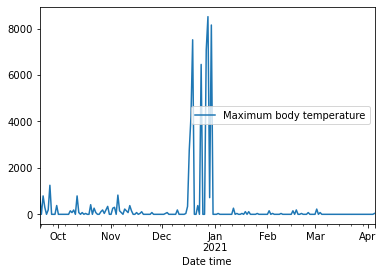

In [ ]:
df.resample(str('1D')).sum().plot()